In [111]:
###### Import Matplotlib and allow plots to show in the Jupyter Notebook
import matplotlib.pyplot as plt
%matplotlib inline
# Import NumPy and Pandas
import numpy as np
import pandas as pd

# Auto reloads notebook when changes are made
%reload_ext autoreload
%autoreload 2

Basic plot

Text(0, 0.5, 'sin(x)')

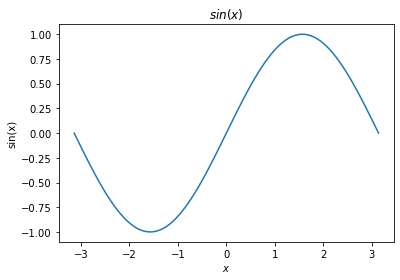

In [114]:
x = np.linspace(-np.pi, np.pi, 100) #Use linspace to generate the domain for your function
y = np.sin(x) #Let y define the function 
plt.plot(x, y) #Plot x against y
plt.title('$sin(x)$') #You can use latex in your labels
plt.xlabel('$x$')
plt.ylabel('sin(x)')
#Use plt.show() whenever you're not in JNB

Print Multiple plots

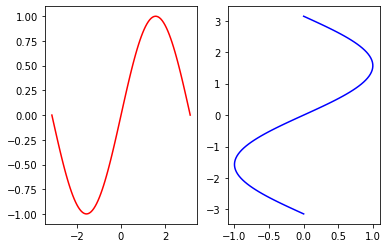

In [116]:
'''It's worth noting exactly how we defined this. 
There is 1 row, and there are 2 columns, like: [1][2]. 
Then we defined the first plot as being in position [1] and the second in position [2]. '''

###Plot in the first column
plt.subplot(1,2,1) #position = (number of rows, number of columns, position)
plt.plot(x,y,'r') 

###Plot in the second column
plt.subplot(1,2,2) #position = (number of rows, number of columns, position)
plt.plot(y,x,'b')

Using Figure Objects

Text(1.5707963267948966, 1, 'Max')

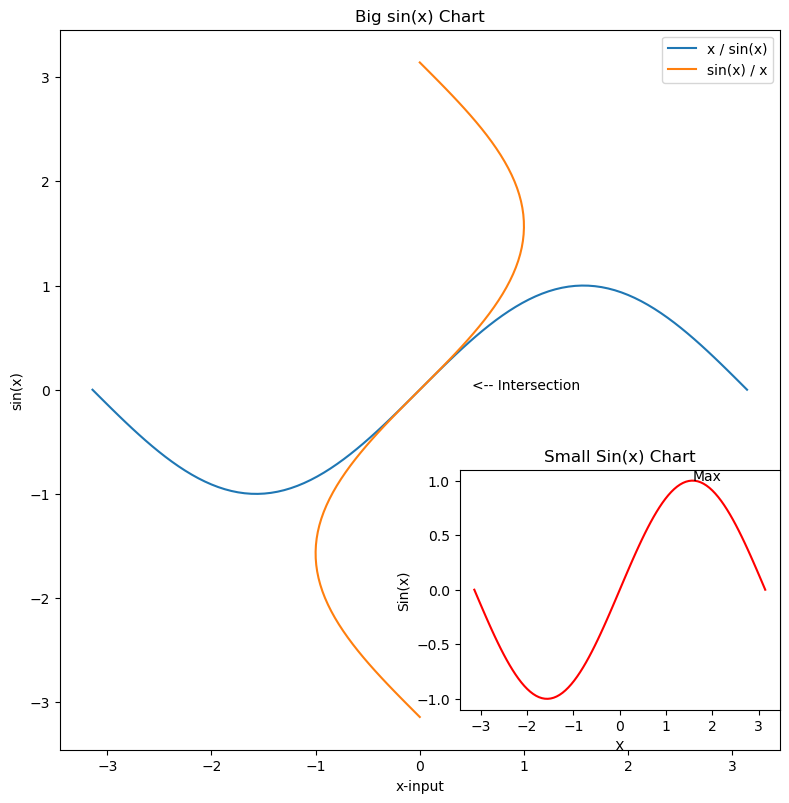

In [146]:
'''Figure: an object that contains all the plot elements.
It can contain many axes
Width & height are in inches
Dots enumerated by the inch '''

fig_1 = plt.figure(figsize=(8,8),dpi=100) #5 inches by 4 inches, 100 dots per inch. 

# Adds axes with a left, bottom, width and height that ranges from 0 to 1
# in terms of the percent (1 = 100%) of the canvas you want to use
axes_1 = fig_1.add_axes([0.1,0.1,0.9,0.9])

'''Recall our plot'''
axes_1.set_xlabel('x-input')
axes_1.set_ylabel('sin(x)')
axes_1.set_title('Big sin(x) Chart')

axes_1.plot(x,y,label='x / sin(x)') #plotting on the axes
axes_1.plot(y,x,label='sin(x) / x') #plotting the inverse on the same axes

# Add the optional legend with a location number (best: 0, 
# upper right: 1, upper left: 2, lower left: 3, lower right: 4,
# https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.legend.html)
# or supply a tuple of x & y from lower left
'''
Normal choice of placement: 0
Upper right: 1
Upper left: 2
Lower left: 3
Lower right: 4
'''

axes_1.legend(loc=0) 

''' You can create axis inside of others by using add_axes()'''
axes_2 = fig_1.add_axes([0.60,0.15,0.4,0.3])# Same deal: left, bottom, width and height but inside the plot
axes_2.set_xlabel('X')
axes_2.set_ylabel('Sin(x)')
axes_2.set_title('Small Sin(x) Chart')
axes_2.plot(x, y,'r')


axes_1.text(0.5, 0, '<-- Intersection')# Adding text at a coordinate with respect to the central point of 0,0
axes_2.text(np.pi/2, 1, 'Max')# Adding text at a coordinate with respect to the central point of 0,0 in small figure


Subplots

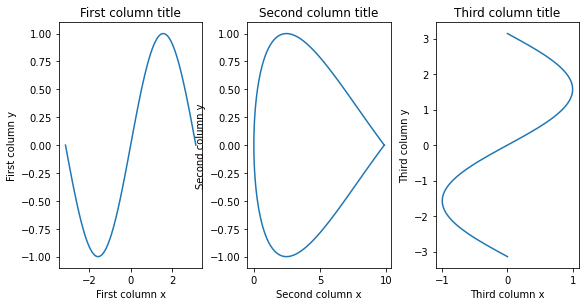

In [152]:
''' This is a lot like what we did earlier 
but you don't have to be as specific; axes_2 is a list of axes objects''' 
fig_2, axes_2 = plt.subplots(figsize=(8,4), nrows=1, ncols=3)
plt.tight_layout()# Puts spaces between the plots

'''You can access the plots through indexing, beginning at 0 like normal.
I moved these around to show how to access what and where.'''

axes_2[0].set_title('First column title')
axes_2[0].set_xlabel('First column x')
axes_2[0].set_ylabel('First column y')
axes_2[0].plot(x,y)

axes_2[1].set_title('Second column title')
axes_2[1].set_xlabel('Second column x')
axes_2[1].set_ylabel('Second column y')
axes_2[1].plot(x**2,y)

axes_2[2].set_title('Third column title')
axes_2[2].set_xlabel('Third column x')
axes_2[2].set_ylabel('Third column y')
axes_2[2].plot(y,x)

## Appearance Options

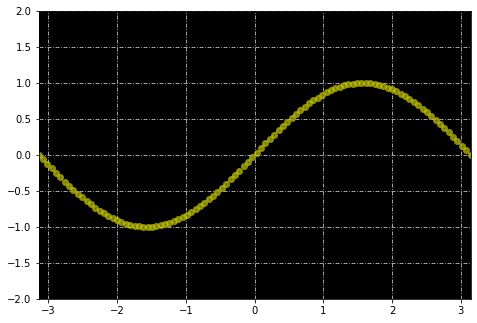

In [174]:
'''I'm going to go ahead and play with this until I can get it to look like an oscilloscope'''

fig_3 = plt.figure(figsize=(6,4))
axes_3 = fig_3.add_axes([0,0,1,1])

'''
Default colors:
b: blue
g: green
r: red
c: cyan
m: magenta,
y: yellow
k: black
w: white
hexcodes work like: color = #eeefff
color names work like: color = "burlywood" 
continueous color tones work like: color="0.75" 
alpha defines the percentage of opacity
use https://en.wikipedia.org/wiki/Web_colors for anything specific
default line width is 1
Line-styles: matplotlib.org/3.1.0/gallery/lines_bars_and_markers/linestyles.html
Can define line styles like '-.'
Can define markers (type and size) as well https://matplotlib.org/3.3.0/api/markers_api.html
markerfacecolor: fill color
markeredgecolor: stroke color
markeredgewidth: stroke size
'''
axes_3.plot(x,y, alpha=.75, lw=2, ls='-.',
           marker='o', markersize=3, markerfacecolor='k',
           markeredgecolor='y', markeredgewidth=4)

axes_3.set_xlim([-np.pi,np.pi]) #bounded from ±π
axes_3.set_ylim([-2,2]) #bounded from ±2 since sinusoidal functions never exceed ±1


Grid = True
axes_3.grid(True, color='0.8', dashes=(5, 2, 1, 2)) #5 points, 1pt dashes, 2pt spaces
axes_3.set_facecolor('black')#Color behind the grind

#And there we go!

Save a Visualization to a File

In [175]:
# You can save your plots to numerous file types : png, pdf, ps, eps, svg, pgf, 
fig_3.savefig('oscilloscope-replica.png')

Histograms

(array([0.0308 , 0.06402, 0.09416, 0.1254 , 0.15554, 0.17776, 0.15246,
        0.11638, 0.09328, 0.0594 , 0.0308 ]),
 array([ 2.        ,  2.90909091,  3.81818182,  4.72727273,  5.63636364,
         6.54545455,  7.45454545,  8.36363636,  9.27272727, 10.18181818,
        11.09090909, 12.        ]),
 <BarContainer object of 11 artists>)

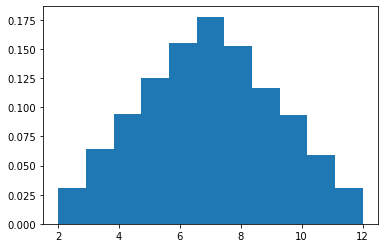

In [8]:
''' Bins are just like the ones in Matlab: 
bins: 11 options ranging from 2 through 12, so 11 options
density: gives the frequency of each bin
range: gets tuple with bin range
cumulative = True means you get a cumulative distribution
histtype = 'step' generates a line plot
orientation = 'horizontal' if you don't want it to be plotted vertically.
color = 'green', works like the other color schemes 
'''
''':::Galton Board Distribution:::'''
#Let's roll two 6 sided dies,tally the results and plot them
d6_1 = np.random.randint(1,7,5000) #recall 7 is not included, and there are 5000 rolls
d6_2 = np.random.randint(1,7,5000)
Galton = d6_1 + d6_2
plt.hist(Galton, bins=11, density=True, stacked=True)
#You can keep running this over and over if you want to get it closer to being the average distribution
#sometimes, because it's random, it could be skewed from the expectation value

Bar Charts

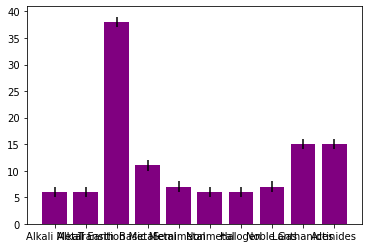

In [107]:
#Plotting the periodic table of elements by element group
x = ['Alkali Metal', 'Alkali Earth', 'Transition Metal', 'Basic Metal',
    'Semimetal', 'Nonmetal', 'Halogen', 'Noble Gas', 'Lanthanides', 'Actinides'] 
y = [6,6,38,11,7,6,6,7,15,15] #number of items each using polymorphism 

#Because this is exact there are no errorbars, but let's just pretend for now 
error= [1]*10 
plt.bar(x, y, color='purple', yerr= error)

Text(0.5, 1.0, 'Physicists at UB by Type')

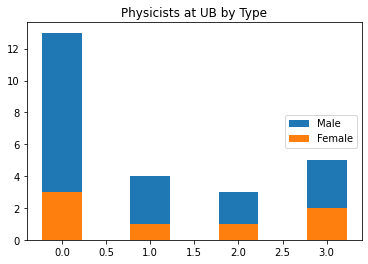

In [109]:
# Plotting physicists by their major from UB the in my graduating year.
# This is just an estimate from what I remember since there were only 25 physics majors total back 
#then and after a few years you knew everybody. 
Physicists  = ['Normal', 'Computational', 'Mathematical', 'Engineering']
males = np.array([10, 3, 2, 3]) #males
females = np.array([3, 1, 1, 2]) #females
index = [x for x, _ in enumerate(Physicists)] #indexing using a for loop and polymorphism

#Plotting two plots at the same time like before, except this time for comparison purposes.
plt.bar(index, males, width=0.45, label='Male', bottom=females)
plt.bar(index, females, width=0.45, label='Female')
plt.legend(loc='right')
plt.title('Physicists at UB by Type')

Pie Charts

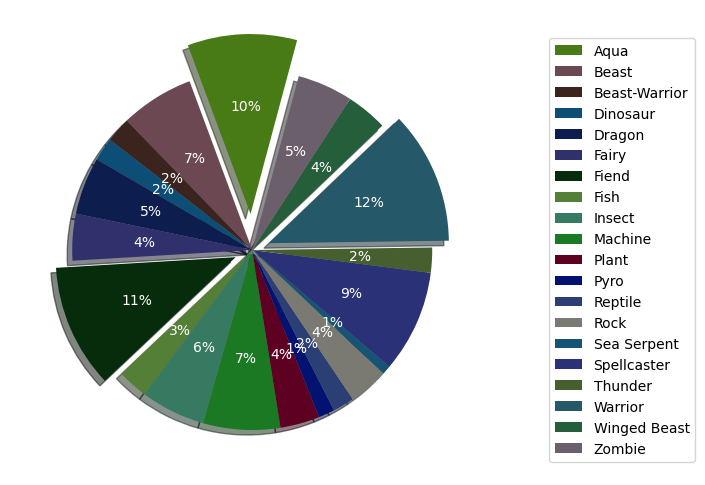

In [176]:
''':::Creating a pie chart of the number of Yugioh Monster Cards from Yu-Gi-Oh Forbidden Memories, my favorite game:::'''
import random

fig = plt.figure(figsize=(8,5),dpi=100)
axes = fig.add_axes([0.1,0.1,0.9,0.9])

types = ['Aqua','Beast','Beast-Warrior','Dinosaur', #Writing 4 items per row to make keeping track more simple
         'Dragon','Fairy','Fiend','Fish',
         'Insect','Machine','Plant','Pyro',
         'Reptile','Rock','Sea Serpent','Spellcaster',
         'Thunder','Warrior','Winged Beast','Zombie']
frequency = [61, 41, 14, 13, #Again, 4 items per row to make it easier to spot mistakes
            32, 26, 69, 17, 
            36, 43, 22, 9,
            12, 22, 5, 57, 
            14, 74, 23, 31 ]

# Generating a random color array, every time you rerun the cell it turns out a different pattern
colors = []
for i in range(20):
    rgb = (random.uniform(0, .5), random.uniform(0, .5), random.uniform(0, .5))
    colors.append(rgb)
    
# Exploding the 3 biggest slices
explode = [0,0,0,0,
          0,0,0.1,0,
          0,0,0,0,
          0,0,0,0,
          0,0.1,0,0,]
explode[0] = 0.2

# Provide values, what to explode and by how much, 
#labels
#colors
#pct for percent values,
# Choose whether you want a shadow, how to rotate the pie, and the text color
wedges, texts, autotexts = plt.pie(frequency, explode=explode, labels=types, colors=colors, 
                                   autopct='%1.0f%%', shadow=True, startangle=75, 
                                   textprops=dict(color="w"))
# Create legend to right and move off pie with 1-1.5 axes point width
plt.legend(wedges, types, loc='right', bbox_to_anchor=(1,0, 0.5, 1))

Tables

In [94]:
solar = pd.read_csv('solardata.csv')
solar_np = solar.to_numpy()
solar

,Planet,Mass,Gravity,Day,Year,Moons
0,Mercury,0.0553,0.378,174.900,0.241,0
1,Venus,0.8150,0.907,116.800,0.615,0
2,Earth,1.0000,1.000,1.000,1.000,1
3,Mars,0.1070,0.377,1.030,1.880,2
4,Jupiter,317.8000,2.360,0.414,11.900,79
5,Saturn,95.2000,0.916,0.444,29.400,82
6,Uranus,14.5000,0.889,0.718,83.700,27
7,Neptune,17.1000,1.120,0.671,163.700,14
8,Pluto,0.0022,0.071,6.390,247.900,5


In [95]:
#Formatting the solar system data for a desirable number of decimal places
solar['Mass'] = pd.Series([round(val, 3) for val in solar['Mass']], 
                              index = solar.index)
solar['Gravity'] = pd.Series([round(val, 3) for val in solar['Gravity']], 
                              index = solar.index)
solar['Day'] = pd.Series([round(val, 2) for val in solar['Day']], 
                              index = solar.index)
solar['Year'] = pd.Series([round(val, 1) for val in solar['Year']], 
                              index = solar.index)
solar

,Planet,Mass,Gravity,Day,Year,Moons
0,Mercury,0.055,0.378,174.90,0.2,0
1,Venus,0.815,0.907,116.80,0.6,0
2,Earth,1.000,1.000,1.00,1.0,1
3,Mars,0.107,0.377,1.03,1.9,2
4,Jupiter,317.800,2.360,0.41,11.9,79
5,Saturn,95.200,0.916,0.44,29.4,82
6,Uranus,14.500,0.889,0.72,83.7,27
7,Neptune,17.100,1.120,0.67,163.7,14
8,Pluto,0.002,0.071,6.39,247.9,5


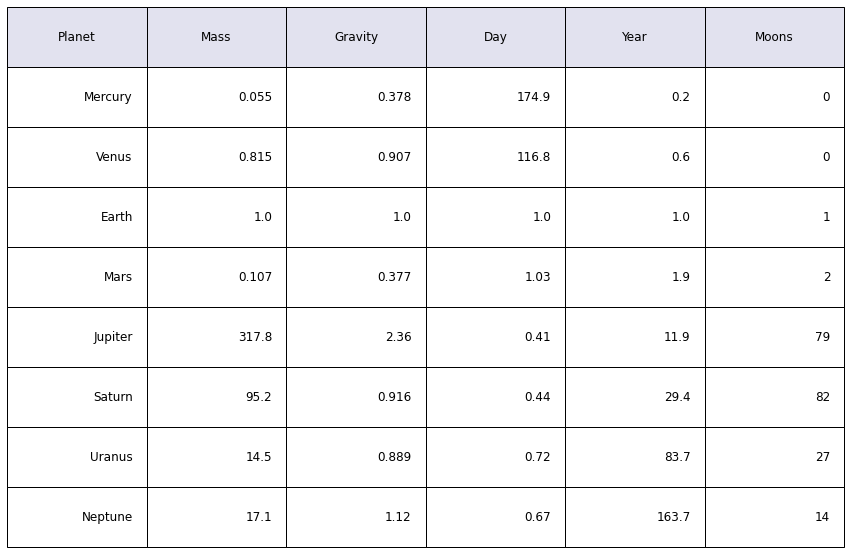

In [93]:
#Let's clean it up and eliminate Pluto just for laughs

rip_pluto= solar[:8] #Gets the first 8 planets
col_head = ('Planet', 'Mass', 'Gravity', 'Day', 'Year', 'Moons') #defines the headers, just get them from the table above
rip_pluto_np = rip_pluto.to_numpy()#Converting to a numpy array
#Add some padding around the cells in the table
plt.figure(linewidth = 5, tight_layout = {'pad':0.75}, figsize=(5,5))
axes = plt.gca()
axes.get_xaxis().set_visible(False)
axes.get_yaxis().set_visible(False)
plt.box(on = None)

ccolors = plt.cm.Purples(np.full(len(col_head), 0.2))

the_table = plt.table(cellText = rip_pluto_np, loc = 'center', colLabels = col_head, 
                     colColours = ccolors)
the_table.set_fontsize(12)
the_table.scale(3,5)

Scatterplots

In [186]:
#Okay so I spent a decent amount of time compiling more statistical data from Yu-Gi-Oh: Forbidden Memories
#Count refers to many cards there are of that type
#Everything else refers to monster attack values in that category
#So the largest attack value for aqua monsters is 2550, and so on. 

ygo = pd.read_csv('yugioh.csv')
ygo

,Type,Count,Mean,Max
0,Aqua,61,1111.475410,2550
1,Beast,41,1120.731707,2300
2,Beast-Warrior,14,1528.571429,2750
3,Dinosaur,13,1411.538462,2200
4,Dragon,32,1968.750000,4500
5,Fairy,26,984.615385,1800
6,Fiend,69,1253.478261,2800
7,Fish,17,1508.823529,2350
8,Insect,36,1084.722222,3500
9,Machine,43,1375.581395,3000


In [190]:
''' Let's make a scatter plot for highest and average attack levels 
as well as number of cards per type. This might tell us if there exists a correlation 
between the number of monster types and monster attack levels.''' 

'''First, because a monster cannot have a float as an attack, we need to round the mean.'''

ygo['Mean'] = pd.Series([round(val, 0) for val in ygo['Mean']], 
                              index = ygo.index)
ygo.save.c

,Type,Count,Mean,Max
0,Aqua,61,1111.0,2550
1,Beast,41,1121.0,2300
2,Beast-Warrior,14,1529.0,2750
3,Dinosaur,13,1412.0,2200
4,Dragon,32,1969.0,4500
5,Fairy,26,985.0,1800
6,Fiend,69,1253.0,2800
7,Fish,17,1509.0,2350
8,Insect,36,1085.0,3500
9,Machine,43,1376.0,3000


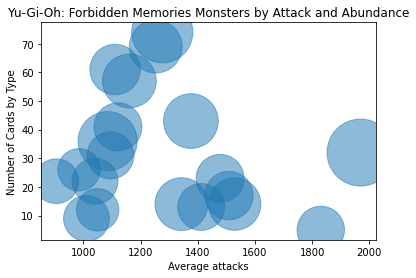

In [191]:
types = np.array([
        'Aqua','Beast','Beast-Warrior','Dinosaur', #Writing 4 items per row 
         'Dragon','Fairy','Fiend','Fish',
         'Insect','Machine','Plant','Pyro',
         'Reptile','Rock','Sea Serpent','Spellcaster',
         'Thunder','Warrior','Winged Beast','Zombie'])

counts = np.array([61, 41, 14, 13, #Again, 4 items per row to make it easier to spot mistakes
                   32, 26, 69, 17, 
                   36, 43, 22, 9,
                   12, 22, 5, 57, 
                   14, 74, 23, 31 ])

average_attacks = np.array([1111,1121,1529,1412,
                            1969,985,1253,1509,
                            1085,1376,905,1011,
                            1050,1041,1830,1161,
                            1343,1276,1478,1095])

highest_attacks = np.array([2550,2300,2750,2200,
                            4500,1800,2800,2350,
                            3500,3000,2000,2100,
                            1800,2100,2250,2900,
                            2800,3750,2300,2200])
#Let's make a color array to see everything better

color_array = np.random.rand(20)
plt.title('Yu-Gi-Oh: Forbidden Memories Monsters by Attack and Abundance')
plt.xlabel('Average attacks')
plt.ylabel('Number of Cards by Type')
plt.scatter(average_attacks, counts, s =highest_attacks, alpha = 0.5 )

'''Comment on the result: Apparently, most monsters are pretty week at under 1500 attack level. 
In practice, most cards are undesirable so the plot fits the reality in this case."'''
